    Random Forest Assignment

    About the data: 
    Let’s consider a Company dataset with around 10 variables and 400 records. 
    The attributes are as follows: 
    - Sales -- Unit sales (in thousands) at each location
    - Competitor Price -- Price charged by competitor at each location
    - Income -- Community income level (in thousands of dollars)
    - Advertising -- Local advertising budget for company at each location (in thousands of dollars)
    - Population -- Population size in region (in thousands)
    - Price -- Price company charges for car seats at each site
    - Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    - Age -- Average age of the local population
    - Education -- Education level at each location
    - Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    - US -- A factor with levels No and Yes to indicate whether the store is in the US or not

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

### Importing the required Libraries 

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# to check the null values of the data
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
print("Dimensions -",company.shape)
print("Column names -",company.columns)

Dimensions - (400, 11)
Column names - Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [6]:
# summarising the information using crosstab
pd.crosstab(company['US'],company['ShelveLoc'])

ShelveLoc,Bad,Good,Medium
US,,,
No,34,24,84
Yes,62,61,135


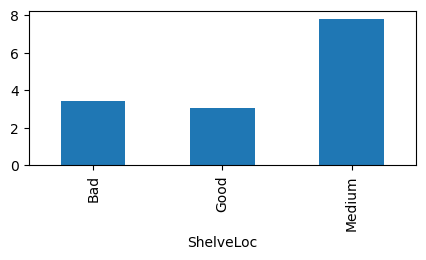

In [7]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,2))
pd.crosstab(company['Advertising'],company['ShelveLoc']).mean().plot(kind='bar');

In [8]:
# to check the dimensions of duplicates in the data
company[company.duplicated()].shape

(0, 11)

#### Outlier Check

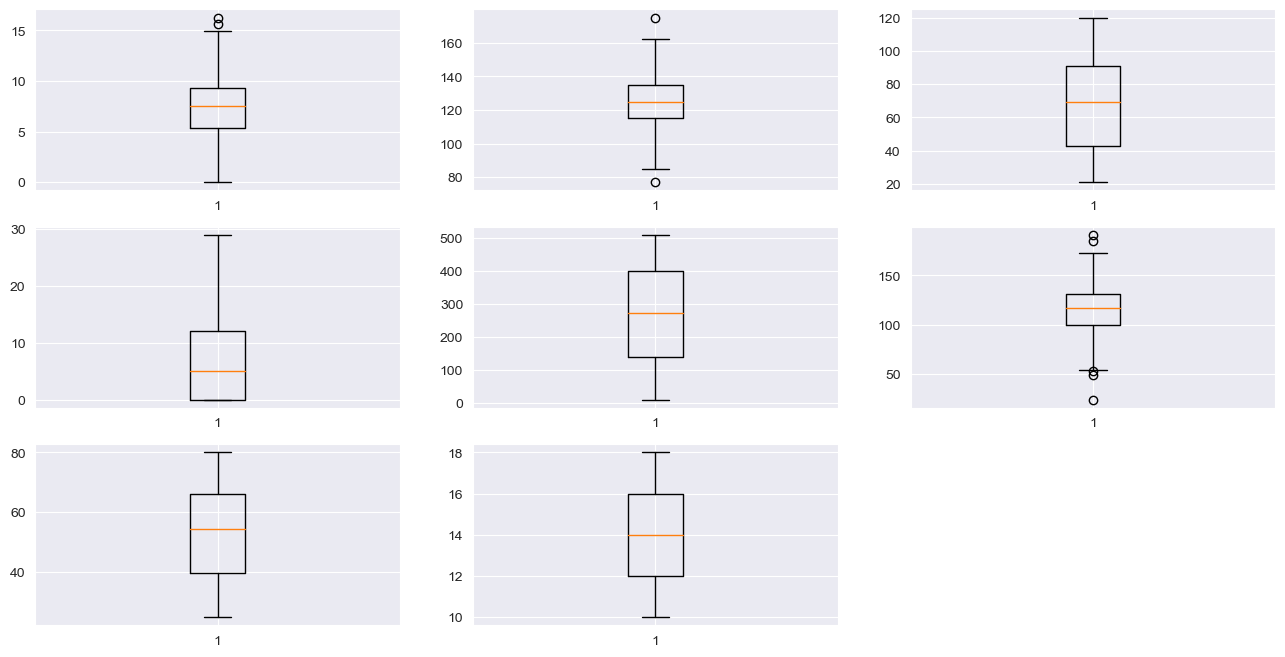

In [9]:
# checking for the Outliers in the variables if present
import warnings
sns.set_style(style='darkgrid')
plt.figure(figsize=(16,8))
plt.subplot(331)
plt.boxplot(company["Sales"])
plt.subplot(332)
plt.boxplot(company["CompPrice"])
plt.subplot(333)
plt.boxplot(company["Income"])
plt.subplot(334)
plt.boxplot(company["Advertising"])
plt.subplot(335)
plt.boxplot(company["Population"])
plt.subplot(336)
plt.boxplot(company["Price"])
plt.subplot(337)
plt.boxplot(company["Age"])
plt.subplot(338)
plt.boxplot(company["Education"])
plt.show()

#### Encoding the Categorical Variables

In [10]:
# Changing the datatype of the varibles from object to category to perform label encoding
company[['ShelveLoc','US','Urban']] = company[['ShelveLoc','US',
                                                       'Urban']].astype('category')
company1 = company
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [11]:
# label Encoding using cat.codes
company1['ShelveLoc'] = company1['ShelveLoc'].cat.codes
company1['US'] = company1['US'].cat.codes
company1['Urban'] = company1['Urban'].cat.codes

company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


#### Now, creating a class based on the mean the variable 'Sales' is continuous

In [12]:
# to get the mean, minimum and maximum values of the variable 'Sales'
print("Mean : ",company1["Sales"].mean(), 
      "\nMin : ",company1["Sales"].min(), 
      "\nMax : ",company1["Sales"].max())

Mean :  7.496325000000001 
Min :  0.0 
Max :  16.27


#### Let's now assume;
#### If Sales <= 7.50 as “Low_Sale=0” and others as “High_Sale=1”

In [13]:
# using the mean value so that we can create a class for 'Sales' variable as low_sales and high_sales
company1["sales"] = pd.cut(company1["Sales"], bins=[0, 7.50, 16.27], labels=["Low_Sale","High_Sale"])
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,High_Sale
1,11.22,111,48,16,260,83,1,65,10,1,1,High_Sale
2,10.06,113,35,10,269,80,2,59,12,1,1,High_Sale
3,7.40,117,100,4,466,97,2,55,14,1,1,Low_Sale
4,4.15,141,64,3,340,128,0,38,13,1,0,Low_Sale


In [14]:
# label encoding for the 'sales' column
company2 = pd.get_dummies(company1.iloc[:,1:], columns=["sales"], drop_first=True)
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_High_Sale
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


### Normalization of the data

In [15]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

comp_norm = norm_func(company2)
comp_norm.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_High_Sale
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,0.0


### Train and Test Split
    Splitting the data into Train and Test data

In [16]:
X = comp_norm.drop(["sales_High_Sale"], axis = 1)
y = comp_norm["sales_High_Sale"]

# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

### K-Fold Cross Validation

In [17]:
kfold = KFold(n_splits=10, shuffle=True)

### Building Model using Random Forest Classifier

In [18]:
# fitting the model using RandomForest Classifier 
model = RandomForestClassifier(n_estimators=50, max_features=4, random_state=42)
model.fit(X_train,y_train)
result = cross_val_score(model, X_train, y_train, cv=kfold)
print(result.mean())

0.8125


In [19]:
# predictions 
preds = model.predict(X_test)
preds

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

In [20]:
pd.crosstab(y_test, preds)

col_0,0.0,1.0
sales_High_Sale,,
0.0,31,10
1.0,5,34


In [21]:
# to get the Accuracy 
np.mean(preds==y_test)*100

81.25

### Conclusion
- On the application of Random Forest Classifier, we got an accuracy score of 81.25%.